# Introduction

dataset of metadata on movies released on or before July 2017

In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import ast

In [2]:
# load datasets
movie_data = pd.read_csv("tmdb_5000_movies.csv")
credits_data = pd.read_csv("tmdb_5000_credits.csv")

## Preview of the datasets

### movie dataset

In [3]:
# display first few rows of the movie dataset
movie_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
movie_data.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [5]:
print("The movie dataset has {} rows and {} columns.".format(len(movie_data), len(movie_data.columns)))

The movie dataset has 4803 rows and 20 columns.


### credits dataset

In [6]:
credits_data.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
print("The credits dataset has {} rows and {} columns.".format(len(credits_data), len(credits_data.columns)))

The credits dataset has 4803 rows and 4 columns.


## Merge movie and credits dataset

In [8]:
credits_data.drop('title', axis=1, inplace=True)

In [9]:
# join movie and credits data
data = pd.merge(movie_data, credits_data, left_on='id', right_on='movie_id')

In [10]:
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [11]:
data.shape

(4803, 23)

# Data Cleaning

## Unnecessary columns

Dropping columns that provide no useful information to the analysis

In [12]:
data = data.drop(columns=['homepage', 'original_title','original_language', 'id', 'movie_id'])

## Data types

In [13]:
# list of column names to change to numeric
#cols = ['id', 'budget']
#for col in cols:
#    data[col] = pd.to_numeric(data[col], errors='coerce', downcast='integer')

#data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

In [14]:
data.dtypes

budget                    int64
genres                   object
keywords                 object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
dtype: object

- convert release date column to datetime

In [15]:
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

## Lists and Dictionaries

some columns have values stored in lists or dictionaries. I will modify theses columns to contain only information needed for the analysis.

In [16]:

cols = ['genres', 'spoken_languages', 'production_countries', 'production_companies', 'keywords', 'cast', 'crew']
for col in cols:
    data[col] = (
    data[col]
    .fillna("[]")
    .apply(ast.literal_eval)
    .apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
    )

## Null values

In [22]:
print("{} out of {} in the revenue column is 0.".format(len(data[data['revenue']==0]),
                                                        len(data['revenue'])))

0 out of 4803 in the revenue column is 0.


The value of 0 is a placeholder for unreported revenue, thus I will change the 0's in the revenue column to NA

In [23]:
data['revenue'] = data['revenue'].replace(0, np.nan)

## New features

### ROI

Add a new column ROI representing the return of investment. Calculated by   
$ROI = \frac{(revenue - cost)}{cost}$

In [24]:
data['ROI'] = (data['revenue'] - data['budget'])/data['budget']

### release year and month

In [25]:
data['year'] = pd.DatetimeIndex(data['release_date']).year
data['month'] = pd.DatetimeIndex(data['release_date']).strftime("%b")

In [26]:
data.head()

,budget,genres,keywords,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,...,status,tagline,title,vote_average,vote_count,cast,crew,ROI,year,month
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2.787965e+09,162.0,...,Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B...",10.763566,2009.0,Dec
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,9.610000e+08,169.0,...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...",2.203333,2007.0,May
2,245000000,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,8.806746e+08,148.0,...,Released,A Plan No One Escapes,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Thomas Newman, Sam Mendes, Anna Pinnock, John...",2.594590,2015.0,Oct
3,250000000,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1.084939e+09,165.0,...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Hans Zimmer, Charles Roven, Christopher Nolan...",3.339756,2012.0,Jul
4,260000000,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,2.841391e+08,132.0,...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Andrew Stanton, John Lasseter...",0.092843,2012.0,Mar


# Data exploration

In [27]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

## Overview

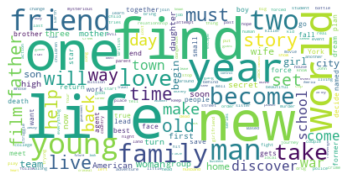

In [28]:
stopwords = set(STOPWORDS)
data['overview'] = data['overview'].astype('str')
overview_text = " ".join(data['overview'])
keywords_cloud = WordCloud(stopwords=stopwords,
                           collocations=False,
                           background_color="white").generate(overview_text)
plt.imshow(keywords_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
import seaborn as sns

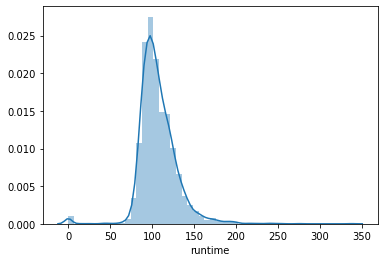

In [30]:
sns.distplot(data.runtime)

## Top ten movies

Sort movie data by revenue in descending order and display the top 10 movies

In [31]:
top_revenue = data.sort_values(by='revenue', ascending=False)
top_revenue.head(10)

,budget,genres,keywords,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,...,status,tagline,title,vote_average,vote_count,cast,crew,ROI,year,month
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2.787965e+09,162.0,...,Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B...",10.763566,2009.0,Dec
25,200000000,"[Drama, Romance, Thriller]","[shipwreck, iceberg, ship, panic, titanic, oce...","84 years later, a 101-year-old woman named Ros...",100.025899,"[Paramount Pictures, Twentieth Century Fox Fil...",[United States of America],1997-11-18,1.845034e+09,194.0,...,Released,Nothing on Earth could come between them.,Titanic,7.5,7562,"[Kate Winslet, Leonardo DiCaprio, Frances Fish...","[Mali Finn, James Horner, James Cameron, James...",8.225171,1997.0,Nov
16,220000000,"[Science Fiction, Action, Adventure]","[new york, shield, marvel comic, superhero, ba...",When an unexpected enemy emerges and threatens...,144.448633,"[Paramount Pictures, Marvel Studios]",[United States of America],2012-04-25,1.519558e+09,143.0,...,Released,Some assembly required.,The Avengers,7.4,11776,"[Robert Downey Jr., Chris Evans, Mark Ruffalo,...","[Alan Silvestri, Christopher Boyes, Christophe...",5.907081,2012.0,Apr
28,150000000,"[Action, Adventure, Science Fiction, Thriller]","[monster, dna, tyrannosaurus rex, velociraptor...",Twenty-two years after the events of Jurassic ...,418.708552,"[Universal Studios, Amblin Entertainment, Lege...",[United States of America],2015-06-09,1.513529e+09,124.0,...,Released,The park is open.,Jurassic World,6.5,8662,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...","[Steven Spielberg, John Papsidera, Frank Marsh...",9.090192,2015.0,Jun
44,190000000,[Action],"[car race, speed, revenge, suspense, car, race...",Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[Universal Pictures, Original Film, Fuji Telev...","[Japan, United States of America]",2015-04-01,1.506249e+09,137.0,...,Released,Vengeance Hits Home,Furious 7,7.3,4176,"[Vin Diesel, Paul Walker, Dwayne Johnson, Mich...","[James Wan, Sanja Milkovic Hays, Peter Brown, ...",6.927628,2015.0,Apr
7,280000000,"[Action, Adventure, Science Fiction]","[marvel comic, sequel, superhero, based on com...",When Tony Stark tries to jumpstart a dormant p...,134.279229,"[Marvel Studios, Prime Focus, Revolution Sun S...",[United States of America],2015-04-22,1.405404e+09,141.0,...,Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...","[Danny Elfman, Christopher Boyes, Christopher ...",4.019299,2015.0,Apr
124,150000000,"[Animation, Adventure, Family]","[queen, musical, princess, betrayal, snowman, ...",Young princess Anna of Arendelle dreams about ...,165.125366,"[Walt Disney Pictures, Walt Disney Animation S...",[United States of America],2013-11-27,1.274219e+09,102.0,...,Released,Only the act of true love will thaw a frozen h...,Frozen,7.3,5295,"[Kristen Bell, Idina Menzel, Jonathan Groff, J...","[John Lasseter, Christophe Beck, Chris Buck, C...",7.494793,2013.0,Nov
31,200000000,"[Action, Adventure, Science Fiction]","[terrorist, war on terror, tennessee, malibu, ...",When Tony Stark's world is torn apart by a for...,77.682080,[Marvel Studios],"[China, United States of America]",2013-04-18,1.215440e+09,130.0,...,Released,Unleash the power behind the armor.,Iron Man 3,6.8,8806,"[Robert Downey Jr., Gwyneth Paltrow, Don Chead...","[Shane Black, Shane Black, John Toll, Louise F...",5.077200,2013.0,Apr
546,74000000,"[Family, Animation, Adventure, Comedy]","[assistant, aftercreditsstinger, duringcredits...","Minions Stuart, Kevin and Bob are recruited b

## production companies

In [32]:
# extract all values from production_companies column
prod_company_stack = (data['production_companies']
               .apply(pd.Series)
               .stack()
               .reset_index(level=1, drop=True)
              )
prod_company_stack.name = 'company'

# get frequency of each production_company
production_freq = (prod_company_stack
              .value_counts()
              .rename_axis('production_company')
              .reset_index(name='movie_count')
             )

In [33]:
prod_df = data.drop('production_companies', axis=1).join(prod_company_stack)

In [34]:
comp_revenue_sum = pd.DataFrame(prod_df
                                .groupby(by=['company'])['revenue']
                                .sum()
                                .sort_values(ascending=False)
                                .reset_index()
                               )

In [35]:
comp_revenue_sum.head(10)

,company,revenue
0,Warner Bros.,4.915575e+10
1,Universal Pictures,4.258847e+10
2,Paramount Pictures,4.087852e+10
3,Twentieth Century Fox Film Corporation,3.935715e+10
4,Walt Disney Pictures,2.868326e+10
5,Columbia Pictures,2.859963e+10
6,New Line Cinema,1.944487e+10
7,Amblin Entertainment,1.609084e+10
8,DreamWorks SKG,1.438453e+10
9,Dune Entertainment,1.379750e+10


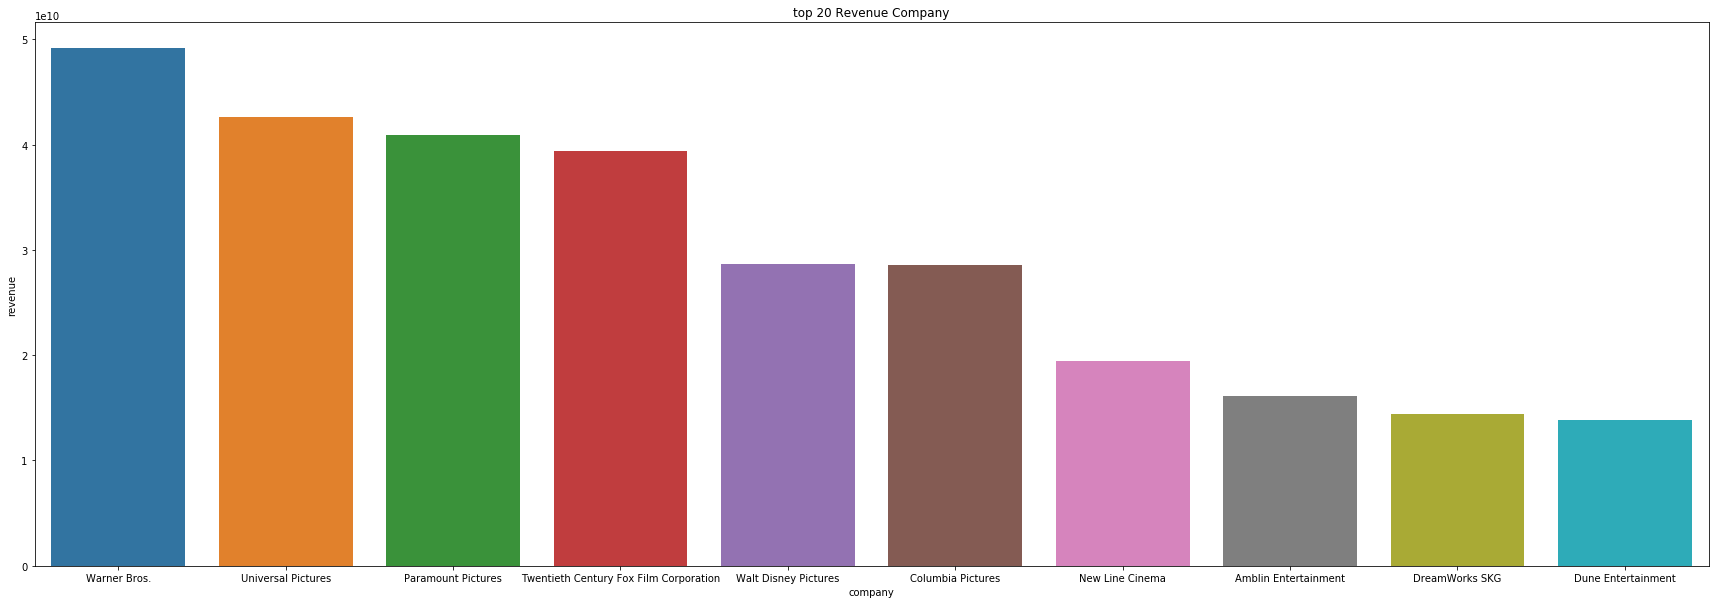

In [36]:
plt.figure(figsize=(30, 10))
sns.barplot(data=comp_revenue_sum.head(10),
            x='company',
            y='revenue').set_title('top 20 Revenue Company')
plt.show()

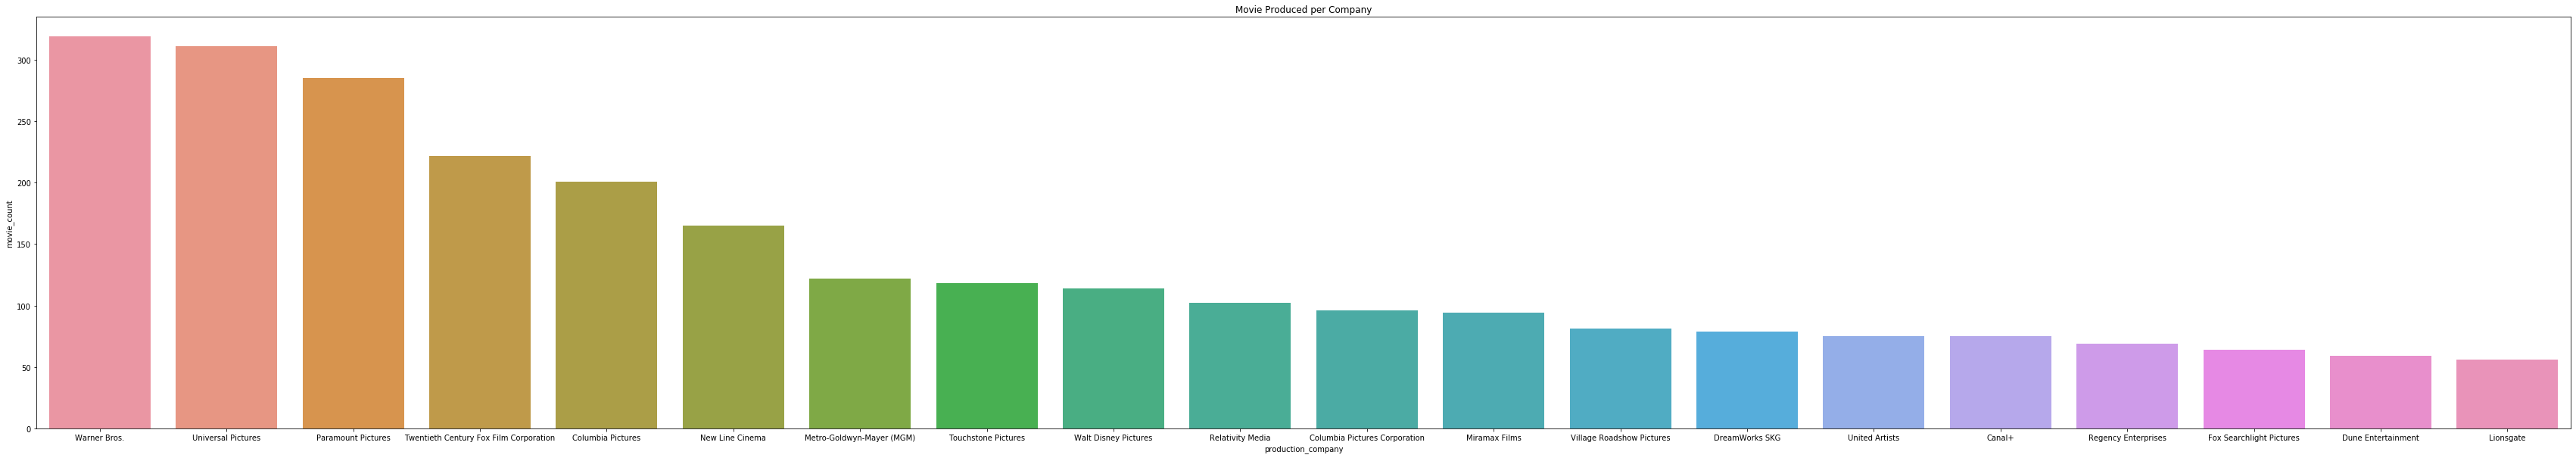

In [37]:
plt.figure(figsize=(60, 10))
sns.barplot(data=production_freq.head(20),
            x='production_company',
            y='movie_count').set_title('Movie Produced per Company')
plt.show()

## Genres

In [38]:
# extract all values from genres column
genre_stack = (data['genres']
               .apply(pd.Series)
               .stack()
               .reset_index(level=1, drop=True)
              )

# get frequency of each genre
genre_freq = (genre_stack
              .value_counts()
              .rename_axis('genre')
              .reset_index(name='movie_count')
             )

In [39]:
genre_freq

,genre,movie_count
0,Drama,2297
1,Comedy,1722
2,Thriller,1274
3,Action,1154
4,Romance,894
5,Adventure,790
6,Crime,696
7,Science Fiction,535
8,Horror,519
9,Family,513


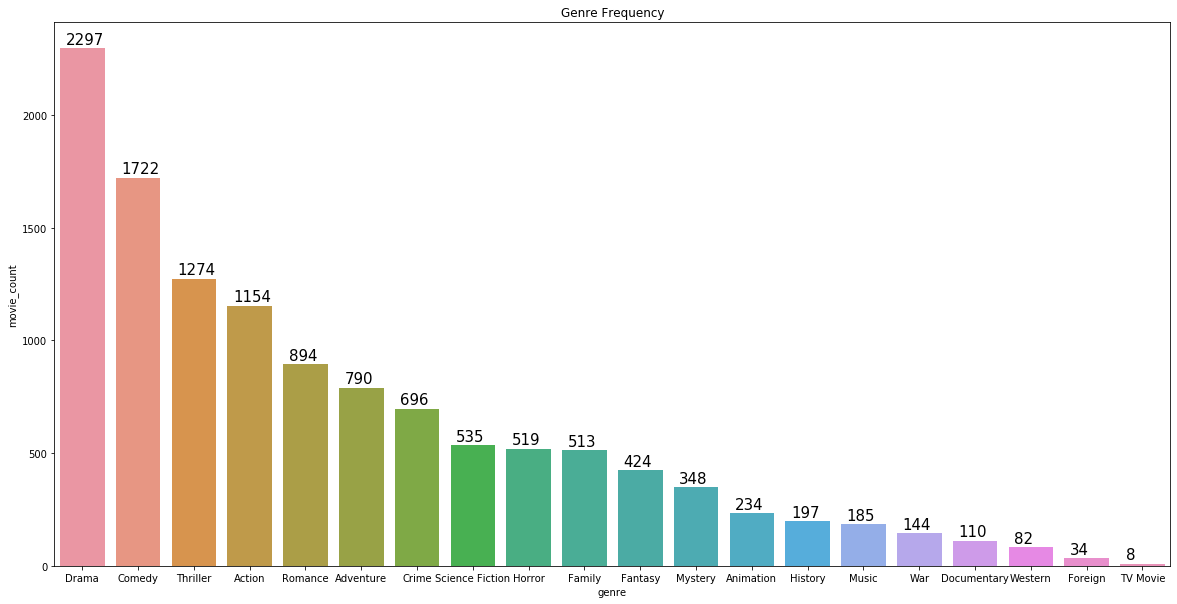

In [71]:
plt.figure(figsize=(20, 10))
x =genre_freq['genre'].values.tolist()
y=genre_freq['movie_count'].values.tolist()
sns.barplot(data=genre_freq, x='genre', y='movie_count').set_title('Genre Frequency')
for a,b in enumerate(y):
    plt.text(a - 0.3, b + 20, str(b), fontsize=15)
plt.show()

## release year and month